# Participantes do Grupo 6


Josiel Pantaleão

Rodrigo Mendes

Matheus Fares

Mariana Dourado

# Importando as bibliotecas

In [193]:
#!pip install -U pandas-profiling

In [194]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Abrindo o dataset


In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
path = '/content/drive/MyDrive/AMS'
# Dataset de treino
df_train = pd.read_csv(path + '/classificacao_binaria_train.csv',delimiter=";")
df_train.head(5)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1506266,4178993,2459565,Guia de solicitac?o SP/SADT,2437002.0,1,CLINICA,Medico oncologista clinico,NaN,NaN,...,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,Autorizado
1,1586873,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,2428370.0,1,HOSPITAL,Medico em medicina intensiva,NaN,NaN,...,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,Autorizado
2,1556472,4335516,2459597,Guia de solicitac?o SP/SADT,2437266.0,1,CLINICA DE IMAGEM,Medico ginecologista e obstetra,NaN,NaN,...,NaN,PEDIDO MEDICO EM ANEXO,Procedimentos,40901300,"USG - ULTRASSONOGRAFIA - TRANSVAGINAL (UTERO, ...",ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1,Autorizado
3,943431,2331936,2459271,Guia de solicitac?o SP/SADT,2441608.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,H353,\nLAUDO OFTALMOLOGICO \n\n \nPaciente: Patrici...,Procedimentos,30307147,PCT-HM - TRATAMENTO OCULAR QUIMIOTERAPICO COM ...,CORPO VITREO,OLHOS,PROCED. CIRURGICOS E INVASIVOS,1,Negado
4,1107870,2865226,2459361,Guia de solicitac?o SP/SADT,2435597.0,1,PRESTADOR DE SERVICOS,Medico clinico,NaN,NaN,...,NaN,dor cronica.,Procedimentos,41101227,RM - RESSONANCIA MAGNETICA - COLUNA CERVICAL O...,RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2,Autorizado


## Analise geral dos dados

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412540 entries, 0 to 412539
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          412540 non-null  int64  
 1   NR_SEQ_ITEM                412540 non-null  int64  
 2   DT_REQUISICAO              412540 non-null  int64  
 3   DS_TIPO_GUIA               412540 non-null  object 
 4   DT_NASCIMENTO              412529 non-null  float64
 5   NR_PRODUTO                 412540 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  412540 non-null  object 
 7   DS_CBO                     412540 non-null  object 
 8   DS_TIPO_CONSULTA           15689 non-null   object 
 9   QT_TEMPO_DOENCA            281 non-null     float64
 10  DS_UNIDADE_TEMPO_DOENCA    282 non-null     object 
 11  DS_TIPO_DOENCA             967 non-null     object 
 12  DS_INDICACAO_ACIDENTE      380490 non-null  object 
 13  DS_TIPO_SAIDA              0 

In [198]:
variaveis_categoricas = df_train.select_dtypes(include=object).columns
variaveis_numericas = df_train.select_dtypes(include=np.number).columns

variaveis_categoricas, variaveis_numericas

(Index(['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO',
        'DS_TIPO_CONSULTA', 'DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_DOENCA',
        'DS_INDICACAO_ACIDENTE', 'DS_TIPO_INTERNACAO', 'DS_REGIME_INTERNACAO',
        'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'DS_TIPO_ATENDIMENTO',
        'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_ITEM',
        'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO', 'DS_STATUS_ITEM'],
       dtype='object'),
 Index(['NR_SEQ_REQUISICAO', 'NR_SEQ_ITEM', 'DT_REQUISICAO', 'DT_NASCIMENTO',
        'NR_PRODUTO', 'QT_TEMPO_DOENCA', 'DS_TIPO_SAIDA', 'QT_DIA_SOLICITADO',
        'CD_GUIA_REFERENCIA', 'CD_ITEM', 'QT_SOLICITADA'],
       dtype='object'))

In [199]:
df_train[variaveis_numericas].describe()

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DT_NASCIMENTO,NR_PRODUTO,QT_TEMPO_DOENCA,DS_TIPO_SAIDA,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,CD_ITEM,QT_SOLICITADA
count,4.125400e+05,4.125400e+05,4.125400e+05,4.125290e+05,412540.0,281.000000,0.0,120685.000000,7.029800e+04,4.125400e+05,412540.000000
mean,1.151521e+06,2.626495e+06,2.459381e+06,2.439534e+06,1.0,8.960854,NaN,2.460372,1.179341e+06,5.946714e+07,59.127765
std,2.889745e+05,1.179561e+06,1.533197e+02,6.849753e+03,0.0,11.014045,NaN,3.703165,2.497937e+05,2.185481e+08,4056.078153
min,5.796250e+05,8.231270e+05,2.459075e+06,2.421816e+06,1.0,1.000000,NaN,0.000000,5.797030e+05,4.200000e+01,1.000000
25%,9.300360e+05,1.468307e+06,2.459264e+06,2.434627e+06,1.0,3.000000,NaN,1.000000,9.922550e+05,2.020305e+07,1.000000
50%,1.189158e+06,2.760746e+06,2.459402e+06,2.438884e+06,1.0,5.000000,NaN,1.000000,1.186608e+06,4.070601e+07,1.000000
75%,1.385720e+06,3.658920e+06,2.459506e+06,2.443453e+06,1.0,11.000000,NaN,3.000000,1.395000e+06,4.140148e+07,2.000000
max,1.614682e+06,4.525999e+06,2.459622e+06,2.459562e+06,1.0,92.000000,NaN,55.000000,1.613675e+06,3.000079e+09,600343.000000


# Limpeza e adequação do dataset

## Lidando com valores nulos - By: Mariana

In [200]:
# Quantos valores nulos tem em cada feature?
for i in range(0, len(df_train.columns)):
  print("Na feature '", df_train.columns[i],
        "' temos ", df_train[df_train.columns[i]].isnull().sum(),
        " valores nulos de um total de " ,
        df_train[df_train.columns[i]].value_counts(dropna=False).sum(),
        "amostras, isto é, ",
        "{:.4f}".format((df_train[df_train.columns[i]].isnull().sum()/df_train[df_train.columns[i]].value_counts(dropna=False).sum())*100), "%")

Na feature ' NR_SEQ_REQUISICAO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' NR_SEQ_ITEM ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' DT_REQUISICAO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' DS_TIPO_GUIA ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' DT_NASCIMENTO ' temos  11  valores nulos de um total de  412540 amostras, isto é,  0.0027 %
Na feature ' NR_PRODUTO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' DS_TIPO_PREST_SOLICITANTE ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' DS_CBO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.0000 %
Na feature ' DS_TIPO_CONSULTA ' temos  396851  valores nulos de um total de  412540 amostras, isto é,  96.1970 %
Na feature ' QT_TEMPO_DOENCA ' temos  412259  valor

In [201]:
porcentagem_corte_nulo = 90
drop_columns = []

print("As seguintes features seguidas da porcentagem de valores nulos nas amostras serão eliminadas: ")
for i in range(len(df_train.columns)):
  if(((df_train[df_train.columns[i]].isnull().sum()/df_train[df_train.columns[i]].value_counts(dropna=False).sum())*100) > porcentagem_corte_nulo):
    print(df_train.columns[i],
          " (", "{:.4f}".format((df_train[df_train.columns[i]].isnull().sum()/df_train[df_train.columns[i]].value_counts(dropna=False).sum())*100), "% )")
    drop_columns.append(df_train.columns[i])
df_train.drop(drop_columns, axis=1, inplace=True)
print("\nColunas excluídas com sucesso.")

As seguintes features seguidas da porcentagem de valores nulos nas amostras serão eliminadas: 
DS_TIPO_CONSULTA  ( 96.1970 % )
QT_TEMPO_DOENCA  ( 99.9319 % )
DS_UNIDADE_TEMPO_DOENCA  ( 99.9316 % )
DS_TIPO_DOENCA  ( 99.7656 % )
DS_TIPO_SAIDA  ( 100.0000 % )

Colunas excluídas com sucesso.


Verificar as informações do dataset:



In [202]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412540 entries, 0 to 412539
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          412540 non-null  int64  
 1   NR_SEQ_ITEM                412540 non-null  int64  
 2   DT_REQUISICAO              412540 non-null  int64  
 3   DS_TIPO_GUIA               412540 non-null  object 
 4   DT_NASCIMENTO              412529 non-null  float64
 5   NR_PRODUTO                 412540 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  412540 non-null  object 
 7   DS_CBO                     412540 non-null  object 
 8   DS_INDICACAO_ACIDENTE      380490 non-null  object 
 9   DS_TIPO_INTERNACAO         121928 non-null  object 
 10  DS_REGIME_INTERNACAO       121929 non-null  object 
 11  DS_CARATER_ATENDIMENTO     412540 non-null  object 
 12  DS_TIPO_ACOMODACAO         121854 non-null  object 
 13  QT_DIA_SOLICITADO          12

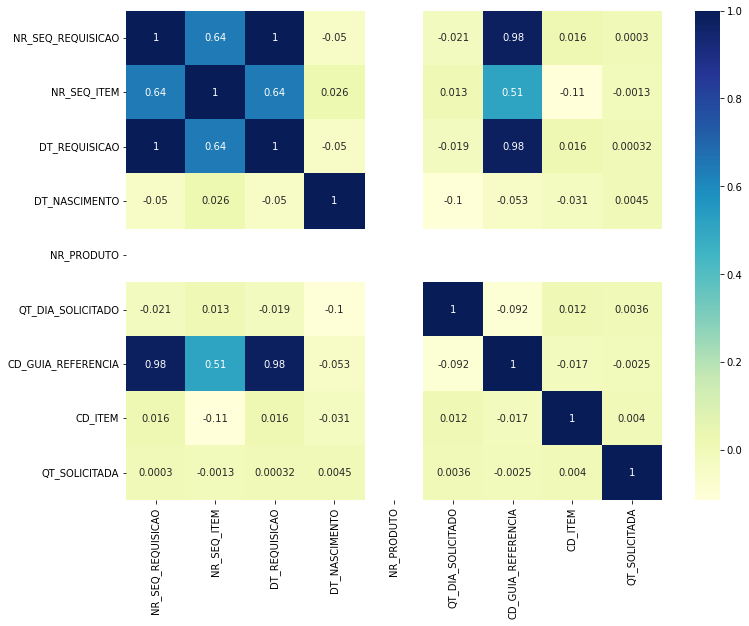

In [203]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

## Descarte de features redundantes ou obsoletas


A matriz de correlação printada acima informa que os coeficientes da coluna 'NR_PRODUTO' são inválidos. Vamos ver o por quê, mediante o print dos seus valores únicos:



In [204]:
df_train["NR_PRODUTO"].value_counts(dropna=False)

1    412540
Name: NR_PRODUTO, dtype: int64

Percebe-se que todas as linhas da coluna 'NR_PRODUTO' estão preenchidas com o valor 1. Logo, essa feature não irá adicionar nada em nosso modelo. Dessa forma, será feita o descarte da mesma:

In [205]:
df_train.drop(["NR_PRODUTO"], inplace=True, axis=1)

Vamos ver a correlação novamente:



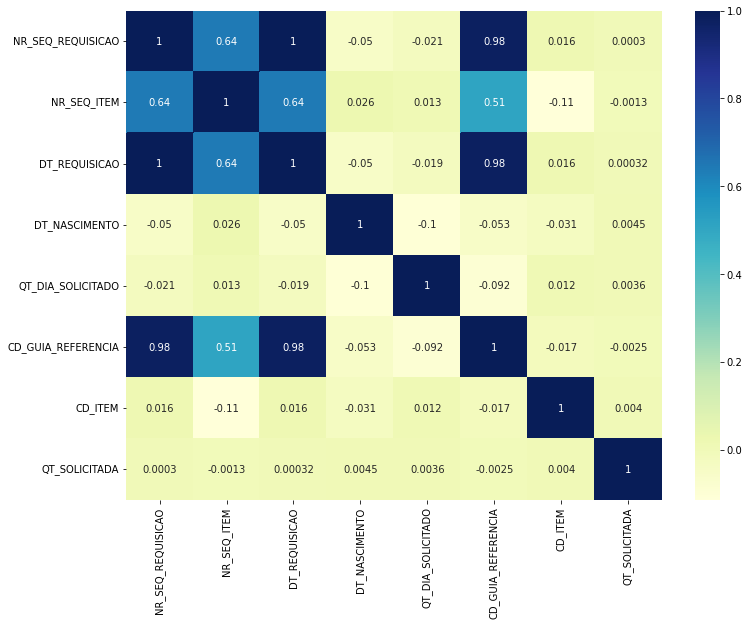

In [206]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

Vamos enxergar melhor a relação entre "CD_GUIA_REFERENCIA", "DT_REQUISICAO" e "NR_SEQ_REQUISICAO".



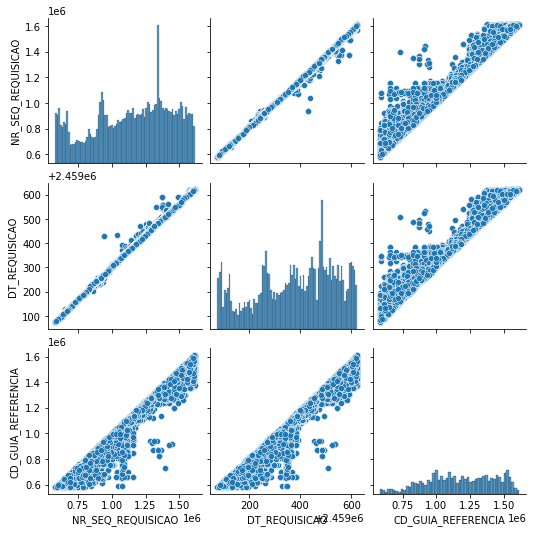

In [207]:
sns.pairplot(df_train.drop(df_train.columns.difference(["CD_GUIA_REFERENCIA","DT_REQUISICAO", "NR_SEQ_REQUISICAO"]), axis=1, inplace=False))

A correlação entre elas é suficientemente alta (muito próximo de 1) para que pelo menos 2 sejam descartadas, visando a diminuição da dimensionalidade do problema. Sabemos que "CD_GUIA_REFERENCIA" tem cerca de 83% dos valores nulos. Por essa razão, tal feature será descartada.

In [208]:
df_train.drop(["CD_GUIA_REFERENCIA"], inplace=True, axis=1)

In [209]:
df_train["DT_REQUISICAO"]

0         2459565
1         2459611
2         2459597
3         2459271
4         2459361
           ...   
412535    2459522
412536    2459352
412537    2459548
412538    2459310
412539    2459569
Name: DT_REQUISICAO, Length: 412540, dtype: int64

Agora falta escolher entre as features "DT_REQUISICAO" e "NR_SEQ_REQUISICAO" para ser descartada. Visto que nenhuma contêm valores nulos, não há como descartar com base nestes. Então, foi escolhida a feature "NR_SEQ_REQUISICAO", por conter menor correlação com "QT_DIA_SOLICITACAO".

In [210]:
df_train.drop(["NR_SEQ_REQUISICAO"], inplace=True, axis=1)

Vamos ver a correlação novamente e partir para a próxima seção:

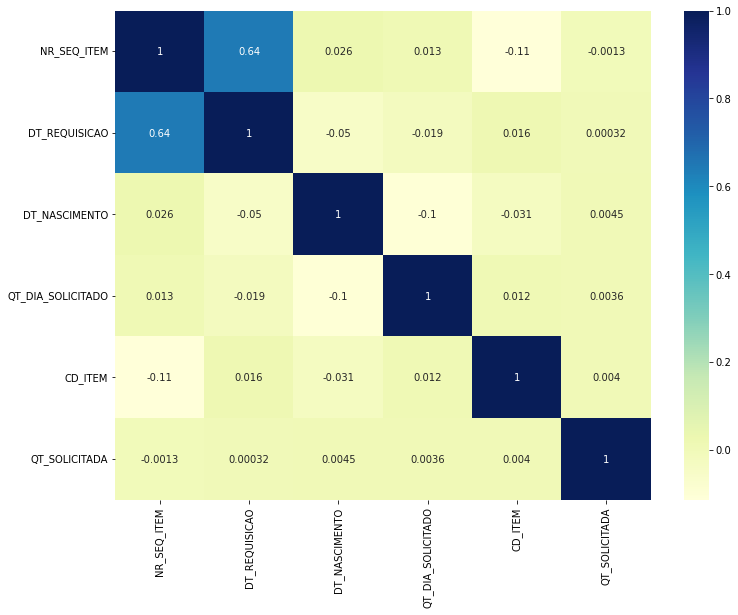

In [211]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

## Lidando com features obsoletas

In [212]:
df_train["QT_DIA_SOLICITADO"].value_counts()

1.0     56024
0.0     16902
2.0     15550
3.0     10056
5.0      6154
4.0      4512
6.0      2113
10.0     1779
7.0      1701
8.0      1006
15.0      893
9.0       710
11.0      477
14.0      412
30.0      387
12.0      372
13.0      271
31.0      235
18.0      222
16.0      203
19.0      156
17.0      108
20.0       95
28.0       82
21.0       60
23.0       54
22.0       50
25.0       33
34.0       19
24.0       18
26.0       17
29.0        5
35.0        3
47.0        3
55.0        2
27.0        1
Name: QT_DIA_SOLICITADO, dtype: int64

In [213]:
df_train["QT_DIA_SOLICITADO"].value_counts()

1.0     56024
0.0     16902
2.0     15550
3.0     10056
5.0      6154
4.0      4512
6.0      2113
10.0     1779
7.0      1701
8.0      1006
15.0      893
9.0       710
11.0      477
14.0      412
30.0      387
12.0      372
13.0      271
31.0      235
18.0      222
16.0      203
19.0      156
17.0      108
20.0       95
28.0       82
21.0       60
23.0       54
22.0       50
25.0       33
34.0       19
24.0       18
26.0       17
29.0        5
35.0        3
47.0        3
55.0        2
27.0        1
Name: QT_DIA_SOLICITADO, dtype: int64

In [214]:
df_train.drop(["QT_DIA_SOLICITADO", "DT_NASCIMENTO"], axis=1, inplace=True)

## Identificação e tratamendo de variáveis categóricas

Acima já vimos quais são as variaveis categóricas, mas para ficar fácil a vizualização vou demostrar quais são elas de novo.

In [215]:
variaveis_categoricas = df_train.select_dtypes(include=object).columns
variaveis_categoricas

Index(['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO',
       'DS_INDICACAO_ACIDENTE', 'DS_TIPO_INTERNACAO', 'DS_REGIME_INTERNACAO',
       'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'DS_TIPO_ATENDIMENTO',
       'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_ITEM',
       'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO', 'DS_STATUS_ITEM'],
      dtype='object')

In [216]:
#covariancia = df_train.cov()
#covariancia

Depois de analisar elas, vemos que o nosso "y", também é categorico e para isso eu transformei o DS_STATUS_ITEM,em valor númerico, mas antes como os parcialmente autorizados eram para ser autorizados no dataset, eu mudei parcialmente autorizados para autorizado e depois e transformei os valores parcialmente autorizados em autorizados.

In [217]:
df_train["DS_STATUS_ITEM"]= df_train["DS_STATUS_ITEM"].replace(['Parcialmente autorizado'],['Autorizado'])

In [218]:
le = preprocessing.LabelEncoder()

coluna =  ["DS_STATUS_ITEM"]

for col in coluna :
  df_train[col] = le.fit_transform(df_train[col])
  print(le.classes_)

df_train.head(2)

['Autorizado' 'Negado']


,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,4178993,2459565,Guia de solicitac?o SP/SADT,CLINICA,Medico oncologista clinico,N?o acidente,NaN,NaN,Eletiva,NaN,...,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,0
1,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,HOSPITAL,Medico em medicina intensiva,N?o acidente,Clinica,Hospitalar,Urgencia/Emergencia,UTI Adulto,...,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,0


Agora que eu transformei a saída, da para ver sua correlação com as outras colunas.

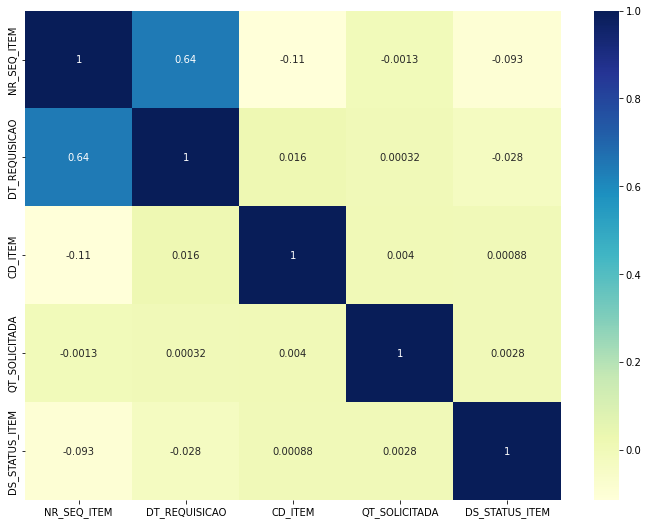

In [219]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

Agora para lidar com os outros valores categóricos usei o onehotencoder.

In [220]:
le = preprocessing.LabelEncoder()

coluna =  ['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO',
          
        'DS_INDICACAO_ACIDENTE', 'DS_TIPO_INTERNACAO', 'DS_REGIME_INTERNACAO',
        'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'DS_TIPO_ATENDIMENTO',
        'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_ITEM',
        'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO']

for col in coluna :
  df_train[col] = le.fit_transform(df_train[col])
  print(le.classes_)

df_train.head(2)

['Guia de solicitac?o SP/SADT'
 'Guia de solicitac?o de prorrogac?o de internac?o'
 'Guia de solicitac?o internac?o']
['CLINICA' 'CLINICA  DE UROLOGIA' 'CLINICA DE IMAGEM'
 'CLINICA DE RADIOLOGIA' 'COOPERATIVA' 'HOME CARE' 'HOSPITAL'
 'INTERCAMBIO' 'LABORATORIO' 'MEDICO' 'PRESTADOR DE SERVICOS' 'UTI']
['CBO do prestador solicitante desconhecido ou n?o informado '
 'Cirurgi?o dentista - clinico geral ' 'Cirurgi?o dentista - dentistica'
 'Cirurgi?o dentista - implantodontista '
 'Cirurgi?o dentista - ortopedista e ortodontista '
 'Cirurgi?o dentista - protesiologo bucomaxilofacial '
 'Cirurgi?o dentista - traumatologista bucomaxilofacial '
 'Fisioterapeuta geral' 'Fonoaudiologo ' 'Medico  neurocirurgi?o'
 'Medico Hematologista' 'Medico Homeopata' 'Medico Mastologista'
 'Medico Nefrologista' 'Medico acupunturista '
 'Medico alergista e imunologista' 'Medico anestesiologista'
 'Medico angiologista ' 'Medico cancerologista cirurgico'
 'Medico cancerologista pediatrico' 'Medico cardiologista

,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,4178993,2459565,0,0,50,0,6,3,0,8,...,170,27845,1,60026251,6457,224,65,7,1,0
1,4433946,2459611,1,6,37,0,1,2,1,6,...,1902,63255,1,20203012,462,410,31,3,6,0


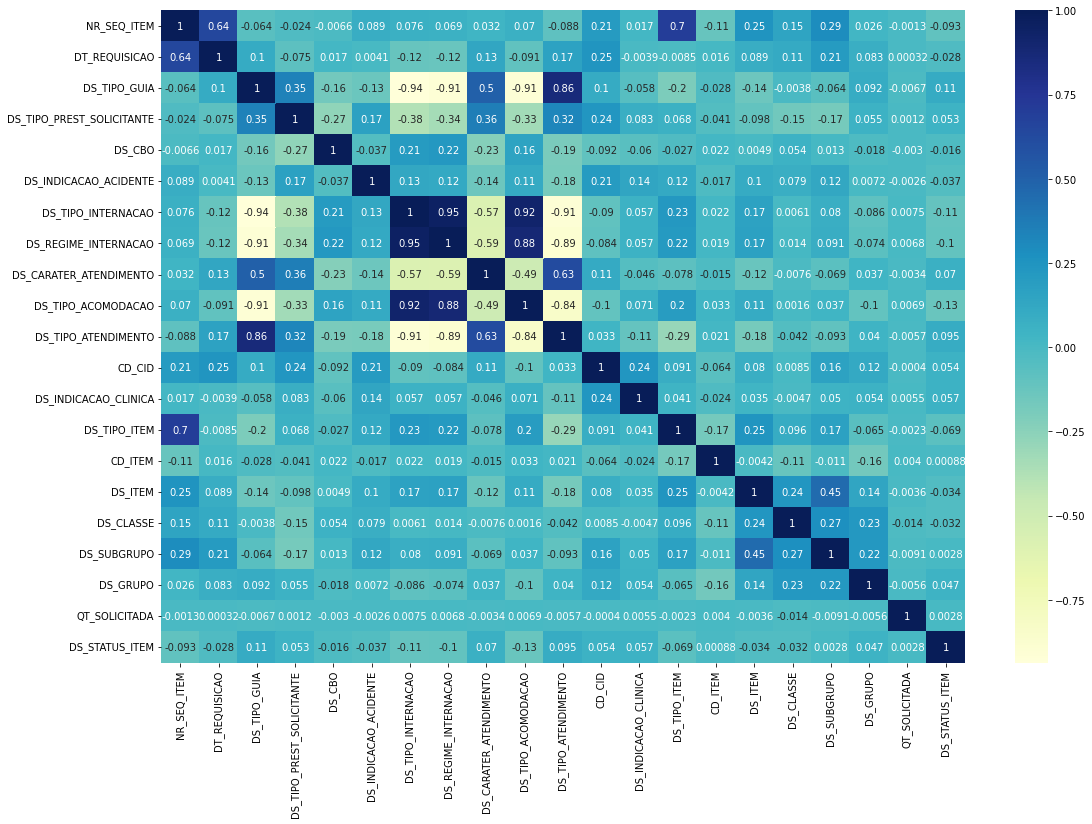

In [221]:
df_train.corr()
plt.figure(figsize=(18,12))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

# Detalhamento dos dados

In [222]:
#profile = ProfileReport(df_train, title='Profiling Diabets',html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

# Treinamento do modelo

In [223]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412540 entries, 0 to 412539
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   NR_SEQ_ITEM                412540 non-null  int64
 1   DT_REQUISICAO              412540 non-null  int64
 2   DS_TIPO_GUIA               412540 non-null  int64
 3   DS_TIPO_PREST_SOLICITANTE  412540 non-null  int64
 4   DS_CBO                     412540 non-null  int64
 5   DS_INDICACAO_ACIDENTE      412540 non-null  int64
 6   DS_TIPO_INTERNACAO         412540 non-null  int64
 7   DS_REGIME_INTERNACAO       412540 non-null  int64
 8   DS_CARATER_ATENDIMENTO     412540 non-null  int64
 9   DS_TIPO_ACOMODACAO         412540 non-null  int64
 10  DS_TIPO_ATENDIMENTO        412540 non-null  int64
 11  CD_CID                     412540 non-null  int64
 12  DS_INDICACAO_CLINICA       412540 non-null  int64
 13  DS_TIPO_ITEM               412540 non-null  int64
 14  CD_I

In [224]:
clf = RandomForestClassifier()

In [225]:
X = df_train.drop(["DS_STATUS_ITEM"], axis=1, inplace=False)
y = df_train["DS_STATUS_ITEM"]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [230]:
clf.fit(X_train, y_train)

RandomForestClassifier()

# Teste do modelo (repartição do dataset de treino)

In [231]:
# Dataset de teste
df_test = pd.read_csv(path + '/classificacao_binaria_test.csv',delimiter=";")
df_test.head()

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA
0,640397,1412803,2459107,Guia de solicitac?o SP/SADT,2451529.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,Exames,H40,Apos avaliac?o oftalmologica paciente acima ap...,Procedimentos,41301315,RETINOGRAFIA DIGITAL MONOCULAR (RETINOGRAFIA S...,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2
1,897240,2192604,2459249,Guia de solicitac?o SP/SADT,2432027.0,1,LABORATORIO,Medico endocrinologista e metabologista,NaN,NaN,...,Exames,NaN,NaN,Procedimentos,40306860,"FATOR REUMATOIDE, QUANTITATIVO, DOSAGEM (TURBI...",IMUNOLOGIA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1
2,636323,1399187,2459104,Guia de solicitac?o SP/SADT,2439123.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,Exames,H353,Apos avaliac?o oftalmologica o paciente acima ...,Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2
3,1425891,3925291,2459525,Guia de solicitac?o SP/SADT,2448718.0,1,CLINICA,Medico ginecologista e obstetra,NaN,NaN,...,Exames,NaN,NaN,Procedimentos,40901386,USG - ULTRASSONOGRAFIA - DOPPLER COLORIDO DE O...,ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1
4,1300316,3513896,2459460,Guia de solicitac?o SP/SADT,2448463.0,1,CLINICA,Medico reumatologista,NaN,NaN,...,Exames,NaN,NaN,Procedimentos,40103331,ELETRONEUROMIOGRAFIA DE MMSS E MMII,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1


In [232]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103136 entries, 0 to 103135
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          103136 non-null  int64  
 1   NR_SEQ_ITEM                103136 non-null  int64  
 2   DT_REQUISICAO              103136 non-null  int64  
 3   DS_TIPO_GUIA               103136 non-null  object 
 4   DT_NASCIMENTO              103136 non-null  float64
 5   NR_PRODUTO                 103136 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  103136 non-null  object 
 7   DS_CBO                     103136 non-null  object 
 8   DS_TIPO_CONSULTA           3857 non-null    object 
 9   QT_TEMPO_DOENCA            71 non-null      float64
 10  DS_UNIDADE_TEMPO_DOENCA    71 non-null      object 
 11  DS_TIPO_DOENCA             218 non-null     object 
 12  DS_INDICACAO_ACIDENTE      95162 non-null   object 
 13  DS_TIPO_SAIDA              0 

Devido ao fato do dataset de teste não conter a coluna `"DS_STATUS_ITEM"`, a acurácia não poderia ser calculada. Dessa forma, o dataset de treino foi anteriormente repartido em: 70% para treino e 30% para teste. 

In [233]:
predictions = clf.predict(X_test)

## Avaliação do modelo

In [234]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     85333
           1       0.77      0.64      0.70     38429

    accuracy                           0.83    123762
   macro avg       0.81      0.78      0.79    123762
weighted avg       0.83      0.83      0.82    123762

